<a href="https://colab.research.google.com/github/SelahattinNazli/Boston_Housing_Price/blob/main/Boston_House_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Here's a brief description of the columns:

- CRIM: Per capita crime rate by town
- ZN: Proportion of residential land zoned for lots over 25,000 sq. ft.
- INDUS: Proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX: Nitrogen oxide concentration (parts per 10 million)
- RM: Average number of rooms per dwelling
- AGE: Proportion of owner-occupied units built prior to 1940
- DIS: Weighted distance to five Boston employment centers
- RAD: Index of accessibility to radial highways
- TAX: Full-value property tax rate per 10,000 dollars
- PTRATIO: Pupil-teacher ratio by town
- LSTAT: Percentage of lower status of the population
- MEDV: Median value of owner-occupied homes in $1000s

# Importing the Libraries

In [53]:
# Let's import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Importing Dataset

In [17]:
# Column headers for the Boston Housing dataset
column_headers = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
]

# Load the dataset with the column headers
housing_data = pd.read_csv("housing.csv", header=None, names=column_headers,delim_whitespace=True)
#Drop the "B" column from dataset
housing_data = housing_data.drop(columns=['B'])

# Display the first few rows of the dataset with proper column headers
housing_data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,5.33,36.2


# Exploratory Data Analysis (EDA)

In [18]:
# Summary statistics for the entire dataset
summary_statistics = housing_data.describe()

summary_statistics


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [23]:
# Check for missing values
missing_values = housing_data.isnull().sum()

missing_values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

In [24]:
# Display information of dataset
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 51.5 KB


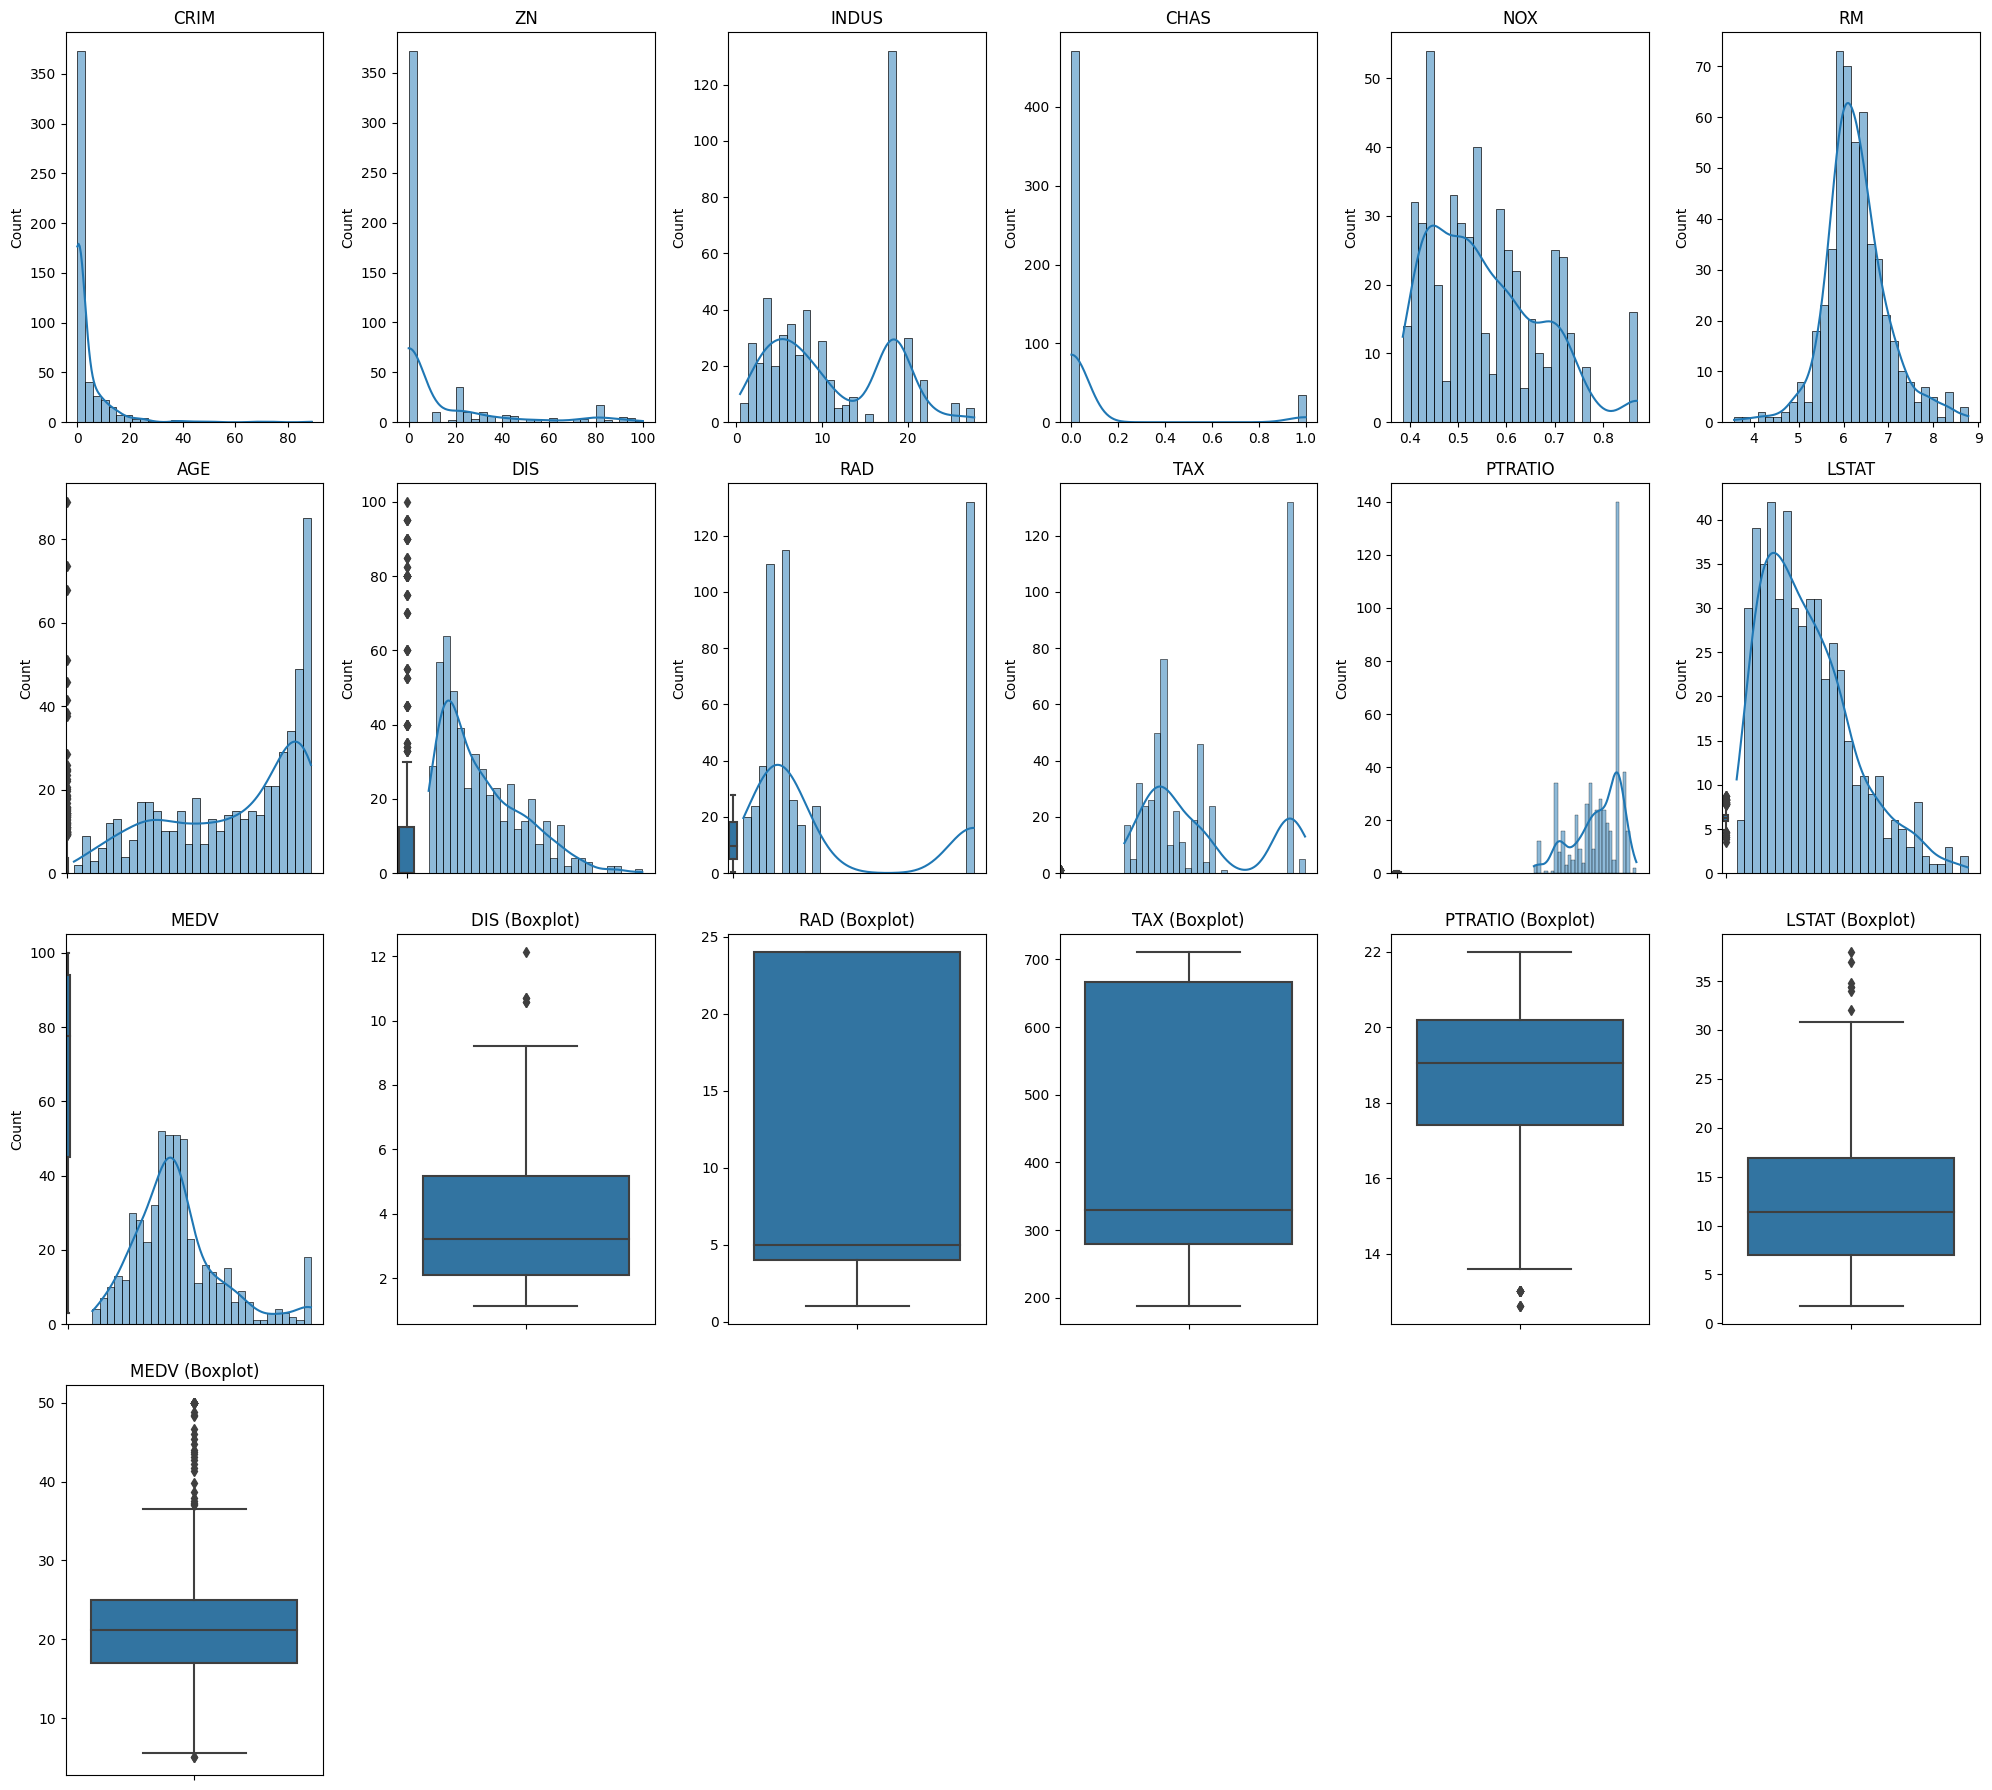

In [20]:
# Initialize the figure for histograms and boxplots
plt.figure(figsize=(20, 18))

# Plotting histograms and boxplots for all the variables
for i, var in enumerate(housing_data, 1):
    plt.subplot(4, 6, i)
    sns.histplot(housing_data[var], bins=30, kde=True)
    plt.title(var)
    plt.xlabel('')

    # Plotting boxplots for the variables on the right
    plt.subplot(4, 6, i + 6)
    sns.boxplot(y=housing_data[var])
    plt.title(var + ' (Boxplot)')
    plt.ylabel('')

plt.tight_layout()
plt.show()


CRIM: The distribution is highly skewed to the right, with most towns having a low crime rate. There are a few towns with exceptionally high crime rates, which are likely outliers.
RM: The distribution is close to normal, but there are some towns with unusually low or high average room numbers.
MEDV: The distribution is approximately normal, but there's a noticeable spike at the value of 50. This could indicate possible capping or clipping of home values at that point. There are several towns that are identified as outliers, particularly on the higher end.

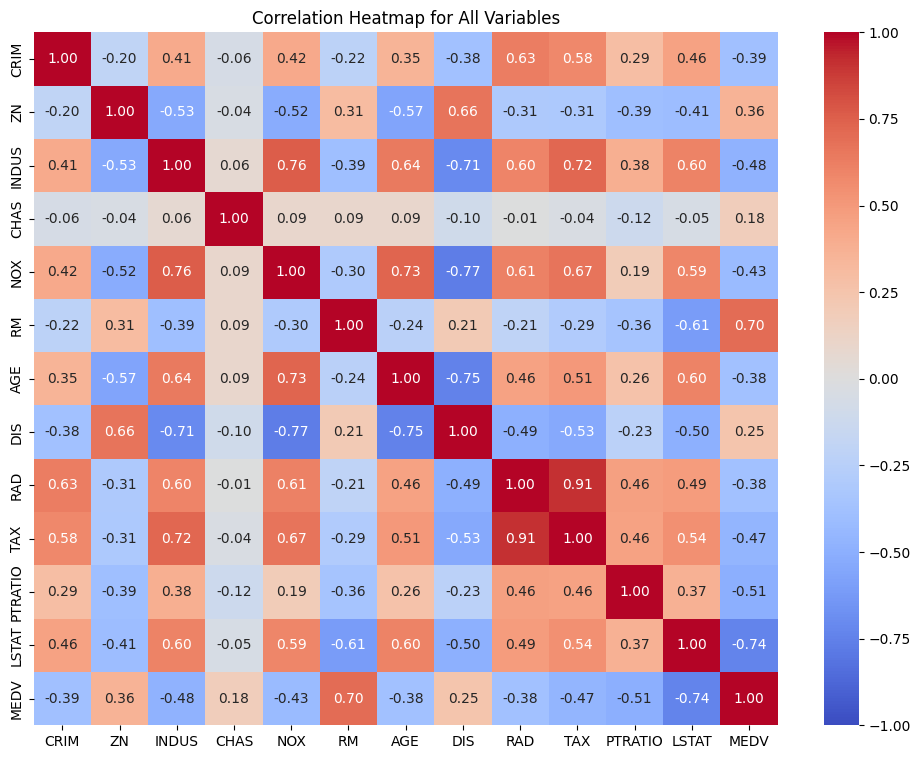

In [21]:
# Correlation matrix for the entire dataset (without the 'B' column)
correlation_matrix_all = housing_data.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix_all, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title('Correlation Heatmap for All Variables')
plt.show()


CRIM (Crime Rate) and MEDV (Median Value of Homes): -0.39
As the crime rate increases, the median value of homes tends to decrease. This is a negative correlation, indicating that areas with higher crime rates are associated with lower house values.

RM (Average Number of Rooms) and MEDV (Median Value of Homes): 0.7
There's a strong positive correlation between the average number of rooms and the median value of homes. This means houses with more rooms, on average, tend to be more valuable.

LSTAT (Lower Status of the Population) and MEDV (Median Value of Homes): 0.74
There's a strong negative correlation between the percentage of the lower status of the population and the median value of homes. This suggests that areas with a higher proportion of lower-status residents tend to have lower house values.

The heatmap gives a clear visual representation of the relationships between the variables. High positive values (closer to 1) indicate a strong positive correlation, while high negative values (closer to -1−1) indicate a strong negative correlation. Values close to 0 suggest weak or no correlation.

# Pre-Processing Steps

We'll scale the features so they have a mean of 0 and a standard deviation of 1. This is important for regression to ensure all features have equal weightage. Then, let's split the data into training and testing sets.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = housing_data.drop("MEDV", axis=1)
y = housing_data["MEDV"]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((404, 12), (102, 12))

# Regression Model Selection

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42)
}

# Train models and evaluate on the test set
rmse_results = {}
r2_results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_results[name] = rmse
    r2 = r2_score(y_test,y_pred)
    r2_results[name] = r2
rmse_results,\
r2_results


({'Linear Regression': 4.772599769922686,
  'Decision Tree Regressor': 2.996632096465735,
  'Random Forest Regressor': 2.836134043680851},
 {'Linear Regression': 0.6893967884614756,
  'Decision Tree Regressor': 0.8775488794579587,
  'Random Forest Regressor': 0.8903144503517515})

In [48]:
# Now let's look at the Neural Network
from sklearn.neural_network import MLPRegressor

# Initialize the neural network
nn_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42, activation='relu', solver='adam')

# Train the model
nn_model.fit(X_train, y_train)

# Predict on the test set
y_pred_nn = nn_model.predict(X_test)

# Calculate RMSE and R^2 for the neural network
rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))
r2_nn = r2_score(y_test, y_pred_nn)

rmse_nn, r2_nn


(3.5339494780400247, 0.8296992412618855)

The neural network model achieved an RMSE of 3.53, which is an improvement over the linear models but is slightly higher than the Random Forest Regressor. The R^2 value of 0.83 indicates that the model explains approximately 83% of the variance in the test set.

# Regularizations

In [41]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# 1. Feature Engineering: Introduce polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# 2. Advanced Regression Technique: Gradient Boosting
gbr = GradientBoostingRegressor(random_state=42)

# Simplifying the hyperparameter grid for Gradient Boosting
simple_param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4],
}

# Conducting a simpler grid search
simple_grid_search = GridSearchCV(gbr, simple_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
simple_grid_search.fit(X_train_poly, y_train)

# Best estimator from the simplified grid search
best_gbr_simple = simple_grid_search.best_estimator_

# Predict on the test set using the best estimator
y_pred_gbr_simple = best_gbr_simple.predict(X_test_poly)

# Calculate RMSE and R^2 for the simplified Gradient Boosting
rmse_gbr_simple = np.sqrt(mean_squared_error(y_test, y_pred_gbr_simple))
r2_gbr_simple = r2_score(y_test, y_pred_gbr_simple)

rmse_gbr_simple, r2_gbr_simple


(3.1098414594977655, 0.8681219829874572)

The Gradient Boosting model with polynomial features and hyperparameter tuning achieved an RMSE of 3.11, which is an improvement over the Neural Network and linear models, and is close to the Random Forest Regressor's performance. The R^2 value of 0.87 indicates that the model explains approximately 87% of the variance in the test set.

# Visualisation of RMSE Results

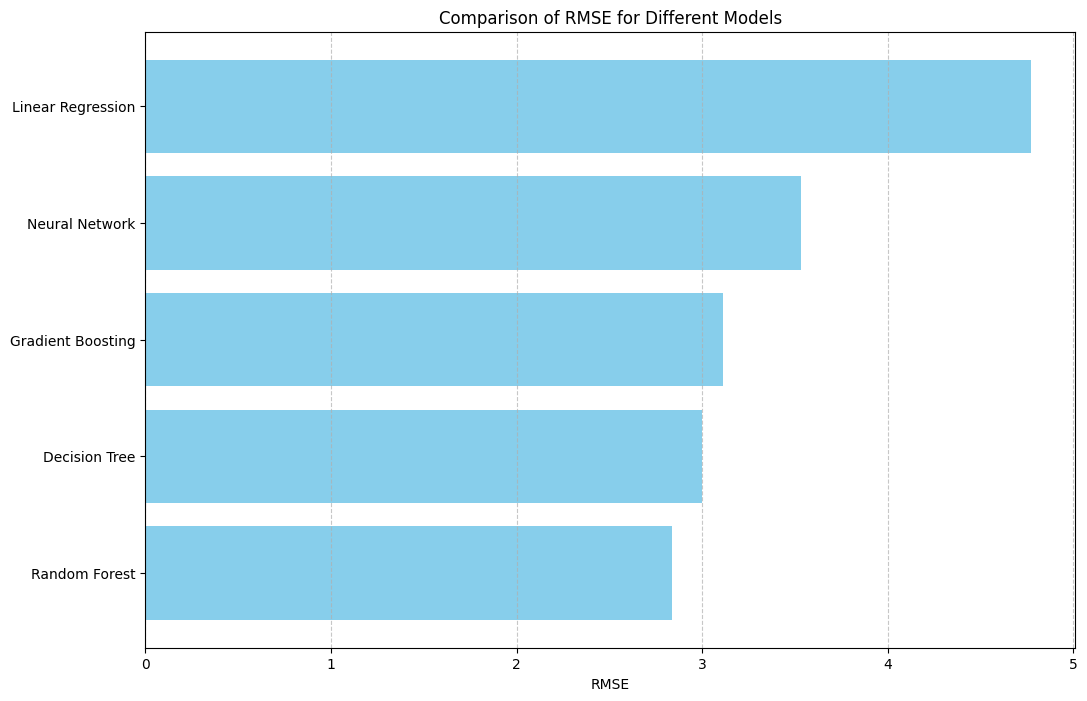

In [52]:
# Re-initializing the models

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# Neural Network
nn_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42, activation='relu', solver='adam')
nn_model.fit(X_train, y_train)
y_pred_nn = nn_model.predict(X_test)
rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))

# Gradient Boosting with simplified hyperparameters
simple_param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4],
}
simple_grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), simple_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
simple_grid_search.fit(X_train_poly, y_train)
best_gbr_simple = simple_grid_search.best_estimator_
y_pred_gbr_simple = best_gbr_simple.predict(X_test_poly)
rmse_gbr_simple = np.sqrt(mean_squared_error(y_test, y_pred_gbr_simple))

# Collating the RMSE results for visualization
rmse_values = {
    "Linear Regression": rmse_lr,
    "Decision Tree": rmse_dt,
    "Random Forest": rmse_rf,
    "Neural Network": rmse_nn,
    "Gradient Boosting": rmse_gbr_simple
}

# Sorting the RMSE values for better visualization
sorted_rmse = dict(sorted(rmse_values.items(), key=lambda item: item[1]))

# Plotting the RMSE values
plt.figure(figsize=(12, 8))
plt.barh(list(sorted_rmse.keys()), list(sorted_rmse.values()), color='skyblue')
plt.xlabel('RMSE')
plt.title('Comparison of RMSE for Different Models')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()
